# **Module 2:** Supervised Learning


In the realm of cybersecurity, the utilization of supervised learning techniques—specifically classification and regression—serves as a linchpin for fortifying defenses, detecting potential threats, and orchestrating robust risk assessment strategies. **Supervised learning**, a key branch of machine learning, operates by learning patterns from labeled datasets to make predictions or decisions about unseen data, proving invaluable in the realm of cybersecurity due to its ability to learn from historical data and adapt to evolving threats.


## Introduction to Supervised Learning in Cybersecurity


Cyber threats continue to proliferate, evolving in sophistication and diversity, necessitating advanced mechanisms to combat them. This is where supervised learning techniques come into play, bolstering cybersecurity efforts by leveraging historical data to fortify defenses against existing threats and predict potential vulnerabilities.


<center>
    <img style="max-width: 600px" src="https://editor.analyticsvidhya.com/uploads/97744How.png" />
</center>


## Classification in Cybersecurity

Supervised learning algorithms, with their ability to learn from labeled historical data, assist in identifying known threats and patterns of attacks. They enable security systems to make informed decisions in real-time by predicting and classifying potential threats or vulnerabilities. Continual training and improvement of these models with updated data help in adapting to evolving cyber threats and attack methods.


### 1. Malware Detection

<center style="float: right; margin: 10px;">
    <img style="max-width: 400px" src="https://www.ayoub-benaissa.com/images/blog/malware-detection.png" />
</center>

Malware detection stands as a critical component within cybersecurity, and supervised learning techniques play a pivotal role in identifying and mitigating the risks posed by malicious software.

Techniques in Malware Detection Using Supervised Learning includes:

#### Static Analysis

Static analysis involves examining the code or file without executing it. Supervised learning models trained on static features, such as **file attributes**, **file structure**, or **code snippets**, help classify malware based on these extracted static features.

#### Dynamic Analysis

Dynamic analysis involves observing the behavior of malware during execution in a controlled environment. Supervised learning models trained on **behavioral patterns** or **API call sequences** discern malicious behavior, aiding in real-time detection of malware.

#### Ensemble Methods

Ensemble methods combine multiple models or classifiers to improve malware detection accuracy. Techniques like **Random Forests** or **Gradient Boosting** assemble multiple weaker models into a stronger, more accurate model for detecting malware.


### 2. Intrusion Detection Systems (IDS)

<center style="float: right; margin: 10px;">
    <img style="max-width: 400px" src="https://www.mdpi.com/sensors/sensors-21-01113/article_deploy/html/images/sensors-21-01113-g001.png" />
</center>

Intrusion Detection Systems (IDS) are vital components of cybersecurity, aiming to identify and respond to unauthorized access, malicious activities, or potential security breaches within computer networks or systems. Supervised learning techniques play a significant role in building effective IDS by aiding in the identification of anomalous network behavior and patterns associated with cyber attacks.

Techniques in Intrusion Detection Using Supervised Learning includes:

#### Signature-based Detection

Supervised learning models recognize known attack patterns or signatures by learning from labeled datasets containing known attack behaviors. These models can quickly identify known threats based on learned signatures.

#### Anomaly-based Detection

Anomaly detection involves identifying deviations from normal network behavior. Supervised learning models trained on normal behavior patterns detect anomalies by flagging behaviors that significantly differ from the learned norm.

#### Hybrid Approaches

Hybrid approaches combine signature-based and anomaly-based detection methods. They leverage supervised learning to detect known attack patterns while also identifying deviations from normal behavior.
Challenges

### 3. Email Filtering

<center style="float: right; margin: 10px;">
    <img style="max-width: 400px" src="https://miro.medium.com/v2/resize:fit:1400/0*j1wMZQ2je5P5DHvN" />
</center>


Email filtering is a critical aspect of cybersecurity, aimed at distinguishing legitimate emails from spam or malicious emails. Supervised learning techniques, particularly classification algorithms, are extensively utilized in email filtering to automatically categorize incoming emails and mitigate the risk of users being exposed to phishing attempts, malware, or other malicious content.

Techniques in Email Filtering Using Supervised Learning inculdes

#### Content-Based Filtering

Supervised learning models analyze the content of emails, including text analysis of email bodies, headers, embedded URLs, or attachments. They learn patterns indicative of spam or phishing attempts, enabling effective content-based filtering.

#### Header and Metadata Analysis

Metadata analysis, such as sender's address, IP reputation, subject line analysis, or header information, aids in identifying suspicious or forged emails. Supervised learning models learn from metadata to detect email anomalies.

#### Behavioral Analysis

Some models employ behavioral analysis, learning user-specific email behaviors to discern normal communication patterns. This helps in flagging anomalous emails that deviate from usual user interaction.


## An exercise on visualising Decision Tree Model

Let us now have a look at some **non-parametric classification** models and ensembles. These models have losses that are not smooth and aren't suited to simple gradient-based optimisation. You are only asked to produce naïve, brute force implementations of these models, but do note that such implementations can scale really badly, so be cautious about running the algorithms with large sample sizes. You may find it interesting to think about what strategies could be used to speed things up.

Examples of the kinds of plots that will be produced by your finished code are shown below. Plotting code is provided, so your plots should look pretty similar, but the default resolution is lower to avoid the code taking too long to run.

![example of completed plots](https://comp0088.github.io/assets/colab/week_3_small.jpg)



### Setting Up

As usual, we make use of the NumPy library for numerical computing and the Matplotlib library for plotting, so we need to import them. We will also use the [Pandas](https://pandas.pydata.org/docs/user_guide/index.html) library for loading data.

In [1]:
import numpy as np
import numpy.random
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

We'll also fetch some shared workshop code and data from the module GitHub

In [2]:
# we will clone workshop resources if they dont exists yet
![ -d wsu_workshop_utils ] || git clone https://github.com/wsu-ai-cyberSecurity/wsu_workshop_utils
    
import wsu_workshop_utils.utils as utils

In [3]:
# finally, set up some items for use in later code
shared_rng = numpy.random.default_rng()

# load the synthetic data
df = pd.read_csv('https://raw.githubusercontent.com/WSU-AI-CyberSecurity/data/master/syn-data.csv')

# Task 1: $k$-Nearest Neighbours

In a $k$-Nearest Neighbours classifier, test samples are compared directly against the samples in the training set and the $k$ most similar (according to some chosen similarity or distance metric) vote on the class to predict. Training such a classifier consists simply of memorising the training set. For the implementation below, we will skip this step and just pass the training data directly to the prediction function.

Although other distance metrics may be useful for real problem classes, for the purposes of this exercise you can stick to a simple Euclidean distance.

You may find the function `vote` in the `utils` module useful.

## 1.1 Implement $k$-Nearest Neighbours prediction

Implement the body of the `nearest_neighbours_predict` function in the cell below.


In [4]:
def nearest_neighbours_predict ( train_X, train_y, test_X, neighbours=1 ):
    """
    Predict labels for test data based on neighbourhood in
    training set.

    # Arguments:
        train_X: an array of sample data for training, where rows
            are samples and columns are features.
        train_y: vector of class labels corresponding to the training
            samples, must be same length as number of rows in X
        test_X: an array of sample data to generate predictions for,
            in same layout as train_X.
        neighbours: how many neighbours to canvass at each test point

    # Returns
        test_y: predicted labels for the samples in test_X
    """
    assert(train_X.shape[0] == train_y.shape[0])
    assert(train_X.shape[1] == test_X.shape[1])

    # TODO: implement the k-nearest neighbours algorithm
    #return None

    # --------

    test_y = np.zeros(test_X.shape[0])

    for ii in range(test_X.shape[0]):
        dists = [ (np.linalg.norm(test_X[ii] - train_X[jj]), train_y[jj]) for jj in range(train_X.shape[0]) ]
        dists.sort(key=lambda z: z[0])

        test_y[ii] = utils.vote([ z[1] for z in dists[:neighbours] ])

    return test_y

## → Run Task 1

Execute the code cell below to run your k-NN function on the test data and plot the results.

Feel free to try out different values for the configuration variables `NUM_SAMPLES`, `RESOLUTION` and `NEIGHBOURS` -- but note that larger values can slow things down significantly.

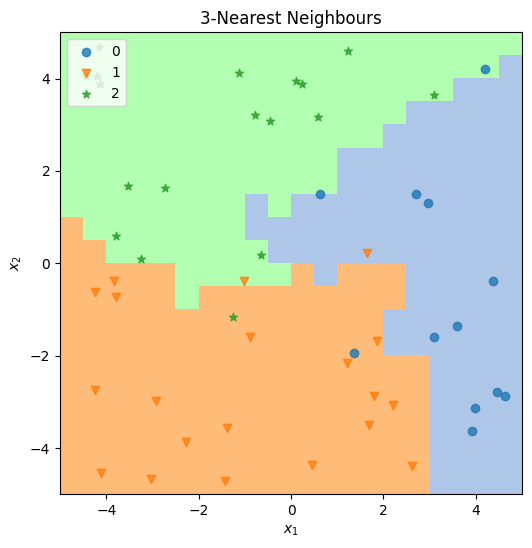

In [5]:
NUM_SAMPLES = 50
RESOLUTION = 20
NEIGHBOURS = 3

X = df[['X1','X2']].values[:NUM_SAMPLES,:]
y = df['Multi'].values[:NUM_SAMPLES]

fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

# this just tests to see whether there's a functioning implementation
# before attempting to pass it to the plotting utility
dummy = nearest_neighbours_predict ( X[:2,:], y[:2], X[:2,:], neighbours=NEIGHBOURS )
if dummy is None:
    utils.plot_unimplemented(ax, f'{NEIGHBOURS}-Nearest Neighbours')
else:
    nn_cls = lambda z: nearest_neighbours_predict ( X, y, z, neighbours=NEIGHBOURS )
    utils.plot_classification_map(ax, nn_cls, X, y, resolution=RESOLUTION, title=f'{NEIGHBOURS}-Nearest Neighbours')


# Task 2: Decision Trees

Decision trees are both a learning model in their own right and an important constituent model for the ensemble methods in subsequent tasks. The model consists of a recursive sequence of binary tests, typically of inequalities on single feature values. These effectively partition the feature space into separate regions, each of which is then assigned the class that occurs most often among training samples within it.(Equivalently, those training samples *vote* on the outcome. Once again, the `utils.vote` function may be useful here.)

Trees can be trained by a greedy brute force search for the split that minimises some chosen loss. Various losses are possible, but for simplicity here (and compatibility with Task 4 later) we will use a **weighted misclassification error** throughout:

$$
L(\mathbf{y}, \hat{\mathbf{y}}, \mathbf{w}) = \sum_i w_i \mathbb{1}(y_i \neq \hat{y}_i)
$$

Trees are a naturally recursive data structure that almost cry out for a class-based implementation, but here we limit ourselves to using dicts to avoid adding syntactical distractions for students who may not be very familiar with Python classes.

## 2.1 Calculate a weighted misclassification error

Implement the `misclassification` function in the code cell below. Note that if `weights` is not provided you should default it to $\frac{1}{n}$.


In [6]:
def misclassification ( y, cls, weights=None ):
    """
    Calculate (optionally-weighted) misclassification error for
    a given set of labels if assigned the given class.

    # Arguments
        y: a set of class labels
        cls: a candidate classification for the set
        weights: optional weights vector specifying relative
            importance of the samples labelled by y

    # Returns
        err: the misclassification error of the candidate labels
    """

    # TODO: implement weighted misclassification metric
    #return 1

    # --------

    if weights is None: weights = 1/len(y)
    return np.sum(weights * (y != cls))

## 2.2 Split a dataset to reduce misclassification

Implement the body of the `decision_node_split` function in the cell below.

Remember to account for the number of points in each child node — the weights should help with this. You should decide on some tie-break policy for when multiple splits produce the same loss improvement.

In [7]:
def decision_node_split ( X, y, cls=None, weights=None, min_size=3 ):
    """
    Find (by brute force) a split point that best improves the weighted
    misclassification error rate compared to the original one (or not, if
    there is no improvement possible).

    Features are assumed to be numeric and the test condition is
    greater-or-equal.

    # Arguments:
        X: an array of sample data, where rows are samples
            and columns are features.
        y: vector of class labels corresponding to the samples,
            must be same length as number of rows in X
        cls: class label currently assigned to the whole set
            (if not specified we use the most common class in y, or
            the lowest such if 2 or more classes occur equally)
        weights: optional weights vector specifying relevant importance
            of the samples
        min_size: don't create child nodes smaller than this

    # Returns:
        feature: index of the feature to test (or None, if no split)
        thresh: value of the feature to test (or None, if no split)
        c0: class assigned to the set with feature < thresh (or None, if no split)
        c1: class assigned to the set with feature >= thresh (or None, if no split)
    """
    assert(X.shape[0] == len(y))

    # TODO: implement this
    #return None, None, None, None

    # --------

    if len(y) < min_size * 2:
        return None, None, None, None

    if cls is None: cls = utils.vote(y)

    if weights is None:
        weights = np.ones(len(y))/len(y)

    g = misclassification(y, cls=cls, weights=weights)
    if g == 0: return None, None, None, None

    best_feat, best_thresh = None, None
    best_c0, best_c1 = None, None
    best_improvement = 0

    for feat in range(X.shape[-1]):
        for thresh in X[:,feat]:
            set1 = X[:,feat] >= thresh
            set0 = ~set1

            if (np.sum(set0) < min_size) or (np.sum(set1) < min_size):
                continue

            y0 = y[set0]
            y1 = y[set1]

            w0 = weights[set0]
            w1 = weights[set1]

            cc0 = np.unique(y0)
            cc1 = np.unique(y1)

            gg0 = [misclassification(y0, cls=cc, weights=w0) for cc in cc0]
            gg1 = [misclassification(y1, cls=cc, weights=w1) for cc in cc1]

            c0 = cc0[np.argmin(gg0)]
            c1 = cc1[np.argmin(gg1)]

            g0 = np.min(gg0)
            g1 = np.min(gg1)

            improvement = g - (g0 + g1)

            if improvement > best_improvement:
                best_feat = feat
                best_thresh = thresh
                best_improvement = improvement
                best_c0 = c0
                best_c1 = c1

    if best_feat is None:
        return None, None, None, None

    return best_feat, best_thresh, best_c0, best_c1


## 2.3 Train a decision tree classifier

Implement the body of the `decision_tree_train` function in the cell below.

(You should find that most of the hard work is already done by your `decision_node_split` function, and this is just responsible for managing the recursion.)

In [8]:
def decision_tree_train ( X, y, cls=None, weights=None, min_size=3, depth=0, max_depth=10 ):
    """
    Recursively choose split points for a training dataset
    until no further improvement occurs.

    # Arguments:
        X: an array of sample data, where rows are samples
            and columns are features.
        y: vector of class labels corresponding to the samples,
            must be same length as number of rows in X
        cls: class label currently assigned to the whole set
            (if not specified we use the most common class in y, or
            the lowest such if 2 or more classes occur equally)
        weights: optional weights vector specifying relevant importance
            of the samples
        min_size: don't create child nodes smaller than this
        depth: current recursion depth
        max_depth: maximum allowed recursion depth

    # Returns:
        tree: a dict containing (some of) the following keys:
            'kind' : either 'leaf' or 'decision'
            'class' : the class assigned to this node (for a leaf)
            'feature' : index of feature on which to split (for a decision)
            'thresh' : threshold at which to split the feature (for a decision)
            'below' : a nested tree applicable when feature < thresh
            'above' : a nested tree applicable when feature >= thresh
    """
    # TODO: implement this
    #return None

    # --------

    if cls is None: cls = utils.vote(y)

    if depth == max_depth:
        return { 'kind' : 'leaf', 'class' : cls }

    feat, thresh, cls0, cls1 = decision_node_split ( X, y, cls=cls, weights=weights, min_size=min_size )

    if feat is None:
        return { 'kind' : 'leaf', 'class' : cls }

    set1 = X[:,feat] >= thresh
    set0 = ~set1

    return { 'kind' : 'decision',
             'feature' : feat,
             'thresh' : thresh,
             'above' : decision_tree_train(X[set1,:], y[set1], cls1, None if weights is None else weights[set1], min_size, depth+1, max_depth),
             'below' : decision_tree_train(X[set0,:], y[set0], cls0, None if weights is None else weights[set0], min_size, depth+1, max_depth) }


## 2.4 Make predictions from a decision tree

Implement the body of the `decision_tree_predict` function in the cell below. You will need to walk the tree for each sample, testing decision nodes until you reach a leaf.

You may find it helpful to define an auxiliary function to process a single sample.

In [9]:
def decision_tree_predict ( tree, X ):
    """
    Predict labels for test data using a fitted decision tree.

    # Arguments
        tree: a decision tree dictionary returned by decision_tree_train
        X: an array of sample data, where rows are samples
            and columns are features.

    # Returns
        y: the predicted labels
    """
    # TODO: implement this
    #return None

    # --------

    # auxiliary function to predict a single example
    def decision_tree_predict1 ( tree, x ):
        # descend the tree until we reach a leaf
        while True:
            if tree['kind'] == 'leaf':
                return tree['class']

            tree = tree['above'] if x[tree['feature']] >= tree['thresh'] else tree['below']

    # iterate the single predictor over all the data
    return np.array([ decision_tree_predict1( tree, X[ii,:] ) for ii in range(X.shape[0]) ])

## → Run Task 2

Execute the code cell below to use your functions above to train and test a decision tree classifier and generate a plot.

As in Task 1, try playing with different values for `NUM_SAMPLES` and `RESOLUTION` and see how this affects the results — and the running time.

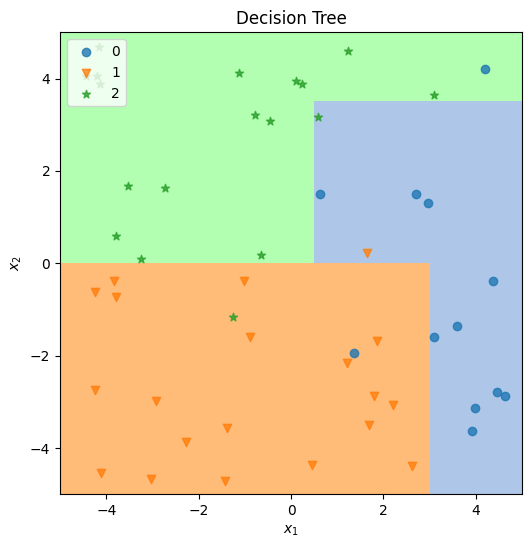

In [10]:
NUM_SAMPLES = 50
RESOLUTION = 20
MIN_SIZE = 3

X = df[['X1','X2']].values[:NUM_SAMPLES,:]
y = df['Multi'].values[:NUM_SAMPLES]

fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

tree = decision_tree_train ( X, y, min_size=MIN_SIZE )
if tree is None:
    utils.plot_unimplemented(ax, f'Decision Tree')
else:
    tree_cls = lambda z: decision_tree_predict ( tree, z )
    utils.plot_classification_map(ax, tree_cls, X, y, resolution=RESOLUTION, title=f'Decision Tree')

# Task 3: Random Forests

Random forests<sup><small>TM</small></sup> are an ensemble model aggregating the predictions from multiple decision trees. Diversity is introduced into the ensemble by training the trees on **bootstrap samples** from the training set, and also by restricting the subset of features used by each tree.

For the exercises below, we will forgo feature subsetting (we will only be using two features anyway) and focus on the **bagging** aspect.


## 3.1 Train a (simplified) random forest classifier

Implement the `random_forest_train` function in the code cell below.

Use the `decision_tree_train` function you wrote in Task 2.3 to train the individual trees. The [choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html) method of the supplied `rng` object should help with bootstrap sampling.

In [11]:
def random_forest_train ( X, y, k, rng, min_size=3, max_depth=10 ):
    """
    Train a (simplified) random forest of decision trees.

    # Arguments:
        X: an array of sample data, where rows are samples
            and columns are features.
        y: vector of binary class labels corresponding to the
            samples, must be same length as number of rows in X
        k: the number of trees in the forest
        rng: an instance of numpy.random.Generator
            from which to draw random numbers
        min_size: don't create child nodes smaller than this
        max_depth: maximum tree depth

    # Returns:
        forest: a list of tree dicts as returned by decision_tree_train
    """

    # TODO: implement this
    #return None

    # --------

    forest = []

    for ii in range(k):
        boot_ix = rng.choice(X.shape[0], X.shape[0])
        X_i = X[boot_ix,:]
        y_i = y[boot_ix]
        forest.append(decision_tree_train ( X_i, y_i, min_size=min_size, max_depth=max_depth ))

    return forest

## 3.2 Make predictions from a (simplified) random forest classifier

Implement the `random_forest_predict` function in the cell below.

Use the `decision_tree_predict` function you wrote in Task 2.4 to predict from the individual trees.

Once again, the `utils.vote` function may be useful here.

In [12]:
def random_forest_predict ( forest, X ):
    """
    Predict labels for test data using a fitted random
    forest of decision trees.

    # Arguments
        forest: a list of decision tree dicts
        X: an array of sample data, where rows are samples
            and columns are features.

    # Returns
        y: the predicted labels
    """
    # TODO: implement this
    #return None

    # --------

    preds = np.array([ decision_tree_predict( tree, X ) for tree in forest ])
    return np.array([ utils.vote(preds[:,ii]) for ii in range(preds.shape[1])])

## → Run Task 3

Execute the cell below to train and test simplified random forest classifier and produce a plot.



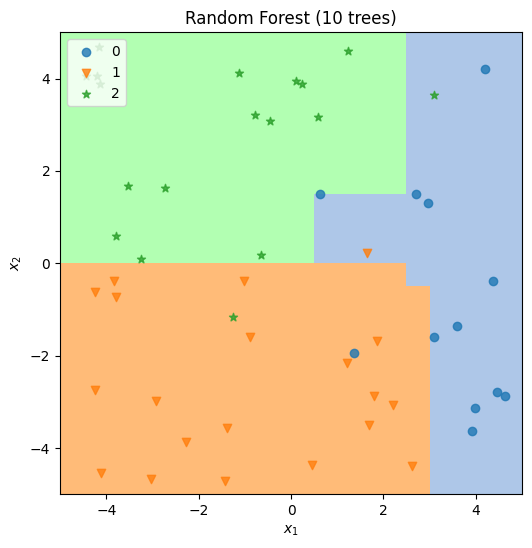

In [13]:
NUM_SAMPLES = 50
RESOLUTION = 20
NUM_TREES = 10

X = df[['X1','X2']].values[:NUM_SAMPLES,:]
y = df['Multi'].values[:NUM_SAMPLES]

fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

forest = random_forest_train ( X, y, NUM_TREES, rng=shared_rng )
if forest is None:
    utils.plot_unimplemented(ax, f'Random Forest')
else:
    forest_cls = lambda z: random_forest_predict ( forest, z )
    utils.plot_classification_map(ax, forest_cls, X, y, resolution=RESOLUTION, title=f'Random Forest ({NUM_TREES} trees)')

# Task 4: AdaBoost

AdaBoost is a meta-algorithm that iteratively builds an ensemble of weak learners such that each new addition provides the best available marginal improvement in the ensemble performance. The new learner is chosen to minimise its weighted classification error on the training set, with the sample weights updated at each iteration to prioritise misclassified points. The training procedure is shown in pseudocode form below:


* Initialise sample weights $w_i = \frac{1}{n}, \quad i \in \{1, 2, \dots, n\}$
* **for** t = 1 to k **do**:
  * fit classifier $h_t$ to minimise misclassification error with weights $w_i$
  * set $\epsilon =$ the weighted misclassification error of $h_t$
  * compute prediction weight: $\alpha_t = \log\big(\frac{1-\epsilon}{\epsilon}\big)$
  * update weights: $w_i \leftarrow w_i \exp(\alpha_t \mathbb{1}(y_i \neq h_i(x_i)))$
  * normalise weights: $w_i = \frac{w_i}{\sum_j w_j}$

Once the ensemble is trained, new samples are classified like this:

$$
\hat{y} = \mathbb{1}\left(\sum_t \alpha_t h_t(\mathbf{x}) \ge 0\right)
$$

Note that the training algorithm has been expressed in terms that don't require a particular binary labelling convention, but the prediction expression above assumes that the outputs of the classifiers $h_t$ are $\{-1, 1\}$. This is *not* the case for the decision trees implemented in Task 2, nor for the synthetic data. So you will need to convert the $h_t$ outputs appropriately within the prediction sum.

AdaBoost is agnostic as to the class of weak learners used, but is commonly implemented using **decision stumps** — decision trees of depth 1 — and that is what you should do here, using the decision tree functions you implemented in Task 2.

## 4.1 Train an AdaBoost classifier

Provide an implementation body for the `adaboost_train` function defined in the cell below.



In [14]:
def adaboost_train ( X, y, k, min_size=1, max_depth=1, epsilon=1e-8 ):
    """
    Iteratively train a set of decision tree classifiers
    using AdaBoost.

    # Arguments:
        X: an array of sample data, where rows are samples
            and columns are features.
        y: vector of binary class labels corresponding to the
            samples, must be same length as number of rows in X
        k: the maximum number of weak classifiers to train
        min_size: don't create child nodes smaller than this
        max_depth: maximum tree depth -- by default we just
            use decision stumps
        epsilon: threshold below which the error is considered 0

    # Returns:
        trees: a list of tree dicts as returned by decision_tree_train
        alphas: a vector of weights indicating how much credence to
            given each of the decision tree predictions
    """
    # TODO: implement this
#    return None, None

    weights = np.ones(X.shape[0])/X.shape[0]
    alphas = []
    trees = []

    for ii in range(k):
        trees.append(decision_tree_train(X, y, weights=weights, min_size=min_size, max_depth=max_depth))
        pred_y = decision_tree_predict(trees[-1], X)
        err = np.dot(weights, pred_y != y)

        # bail if we're classifying perfectly
        if err < epsilon:
            alphas.append(1)
            break

        alphas.append(np.log((1 - err)/err))

        weights = weights * np.exp(alphas[-1] * (pred_y != y))
        weights = weights / np.sum(weights)

    return trees, np.array(alphas)

## 4.2 Make predictions from an AdaBoost classifier

Implement the `adaboost_predict` function in the code cell below.

In [15]:
def adaboost_predict ( trees, alphas, X ):
    """
    Predict labels for test data using a fitted AdaBoost
    ensemble of decision trees.

    # Arguments
        trees: a list of decision tree dicts
        alphas: a vector of weights for the trees
        X: an array of sample data, where rows are samples
            and columns are features.

    # Returns
        y: the predicted labels
    """
    # TODO: implement this
    #return None

    # --------

    preds = np.array([ decision_tree_predict( tree, X ) for tree in trees ]).T * 2 - 1
    weighted = preds @ alphas

    return (weighted >= 0).astype(int)

## → Run Task 4

Execute the code cell below to train and test an AdaBoost classifier and plot the results.


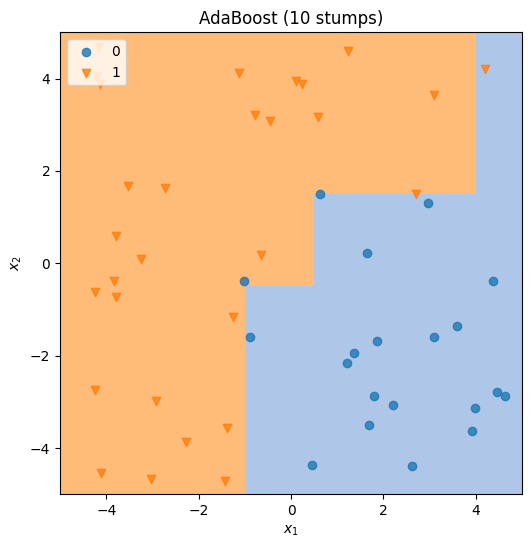

In [16]:
NUM_SAMPLES = 50
RESOLUTION = 20
NUM_TREES = 10

X = df[['X1','X2']].values[:NUM_SAMPLES,:]
y = df['Binary'].values[:NUM_SAMPLES]

fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

trees, alphas = adaboost_train ( X, y, NUM_TREES )
if forest is None:
    utils.plot_unimplemented(ax, f'AdaBoost')
else:
    ada_cls = lambda z: adaboost_predict ( trees, alphas, z )
    utils.plot_classification_map(ax, ada_cls, X, y, resolution=RESOLUTION, title=f'AdaBoost ({NUM_TREES} stumps)')

## Regression in Cybersecurity

Regression techniques in cybersecurity play a pivotal role in predicting and assessing various quantitative measures related to security risks, vulnerabilities, and potential threats. Here are some key applications of regression in cybersecurity

Regression techniques assist in **predicting and quantifying** security risks, aiding in proactive risk management and incident mitigation strategies. By prioritizing and allocating resources effectively, regression models contribute to **optimizing cybersecurity efforts**, focusing on critical areas and vulnerabilities.


### 1. Risk Assessment

<center style="float: right; margin: 10px;">
    <img style="max-width: 400px" src="https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fs41598-023-35198-1/MediaObjects/41598_2023_35198_Fig3_HTML.png" />
</center>

Risk assessment using regression models in cybersecurity involves predicting and quantifying potential security risks, vulnerabilities, and the likelihood of security incidents or breaches. Regression techniques aid in evaluating and estimating the impact and probability of various security threats, enabling organizations to prioritize and allocate resources effectively to mitigate these risks.

#### Quantitative Risk Metrics

Regression models create quantitative risk metrics by combining various factors such as vulnerability scores, threat intelligence, asset value, and historical incident data. These metrics assist in quantifying overall cybersecurity risk.

#### Time Series Analysis for Risk Trends

Regression analysis of historical data helps in identifying trends in security incidents or vulnerabilities over time. It forecasts potential future risks based on past patterns.


### 2. Network Traffic Anomalies

<center style="float: right; margin: 10px;">
    <img style="max-width: 400px" src="https://d34smkdb128qfi.cloudfront.net/images/flowmonlibraries/blogs/10711c43-77a1-4066-bb93-4f7555055a42.png?sfvrsn=4a0f497f_4" />
</center>

Network Traffic Anomalies refer to deviations or irregular patterns within network communication that differ significantly from the expected or "normal" behavior. Analyzing and identifying such anomalies is crucial in cybersecurity as they could indicate potential security breaches, intrusions, or suspicious activities within a network. Regression techniques are employed to predict, identify, and classify these anomalies, enabling proactive detection and response to potential security threats.

#### Predicting Expected Behavior

Regression models analyze historical network traffic data to learn and predict expected patterns or behaviors. They create baselines of normal traffic behavior based on various features such as packet sizes, protocols, or traffic flow.

#### Identifying Deviations from Normal Behavior

Regression-based anomaly detection identifies deviations or outliers from the established baseline. It detects unusual network behavior that may indicate security threats like DoS attacks, intrusions, or malware communication.

#### Quantifying Anomaly Severity

Regression models help in quantifying the severity of anomalies by assessing the deviation from normal traffic patterns. They categorize anomalies based on the degree of deviation and potential impact on the network.


### 3.Threat Severity Prediction

<center style="float: right; margin: 10px;">
    <img style="max-width: 400px" src="https://www.researchgate.net/publication/339121526/figure/fig1/AS:865822692110336@1583439624614/Cybersecurity-criticality-number-CSCN-in-terms-of-severity-vs-likelihood.png" />
</center>
Threat severity prediction involves assessing and quantifying the potential impact or seriousness of various security threats or vulnerabilities within an organization's IT infrastructure. Regression techniques are instrumental in predicting threat severity, enabling cybersecurity professionals to prioritize and allocate resources efficiently to mitigate the most critical security risks.

#### Data Analysis and Feature Extraction

Regression models analyze historical security incident data, vulnerability scores, exploitability, and potential consequences to identify relevant features that contribute to threat severity prediction.

#### Quantifying Threat Impact

Regression techniques help in quantifying the potential impact of identified threats by assigning severity scores or probabilities based on learned patterns and correlations from historical data.

#### Prioritizing Threat Response

Regression-based severity prediction aids in prioritizing response efforts by categorizing threats according to their predicted impact, allowing organizations to focus on addressing high-risk vulnerabilities.


## Real cyersecurity Intrusion Dataset

We will now look at a real cybersecurity dataset available as a [Kaggle Dataset](https://www.kaggle.com/datasets/galaxyh/kdd-cup-1999-data), which was used for **The Third International Knowledge Discovery and Data Mining Tools** Competition.

*Some information about the dataset:*

The competition was held in conjunction with KDD-99 The Fifth International Conference on Knowledge Discovery and Data Mining. The competition task was to build a network intrusion detector, a predictive model capable of distinguishing between bad'' connections, called intrusions or attacks, andgood'' normal connections. This database contains a standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

df = pd.read_csv("https://raw.githubusercontent.com/WSU-AI-CyberSecurity/data/master/intrusion99.csv")

### Visualisation of Dataset

Let's have a look at the content of the dataset:

In [18]:
df.head()

,Unnamed: 0,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
0,0,0,1,0,181,5450,0,0,0,0,...,0.0,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal
1,1,0,1,0,239,486,0,0,0,0,...,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal
2,2,0,1,0,235,1337,0,0,0,0,...,0.0,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal
3,3,0,1,0,219,1337,0,0,0,0,...,0.0,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal
4,4,0,1,0,217,2032,0,0,0,0,...,0.0,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal


It's always good practice to visualise features correlation

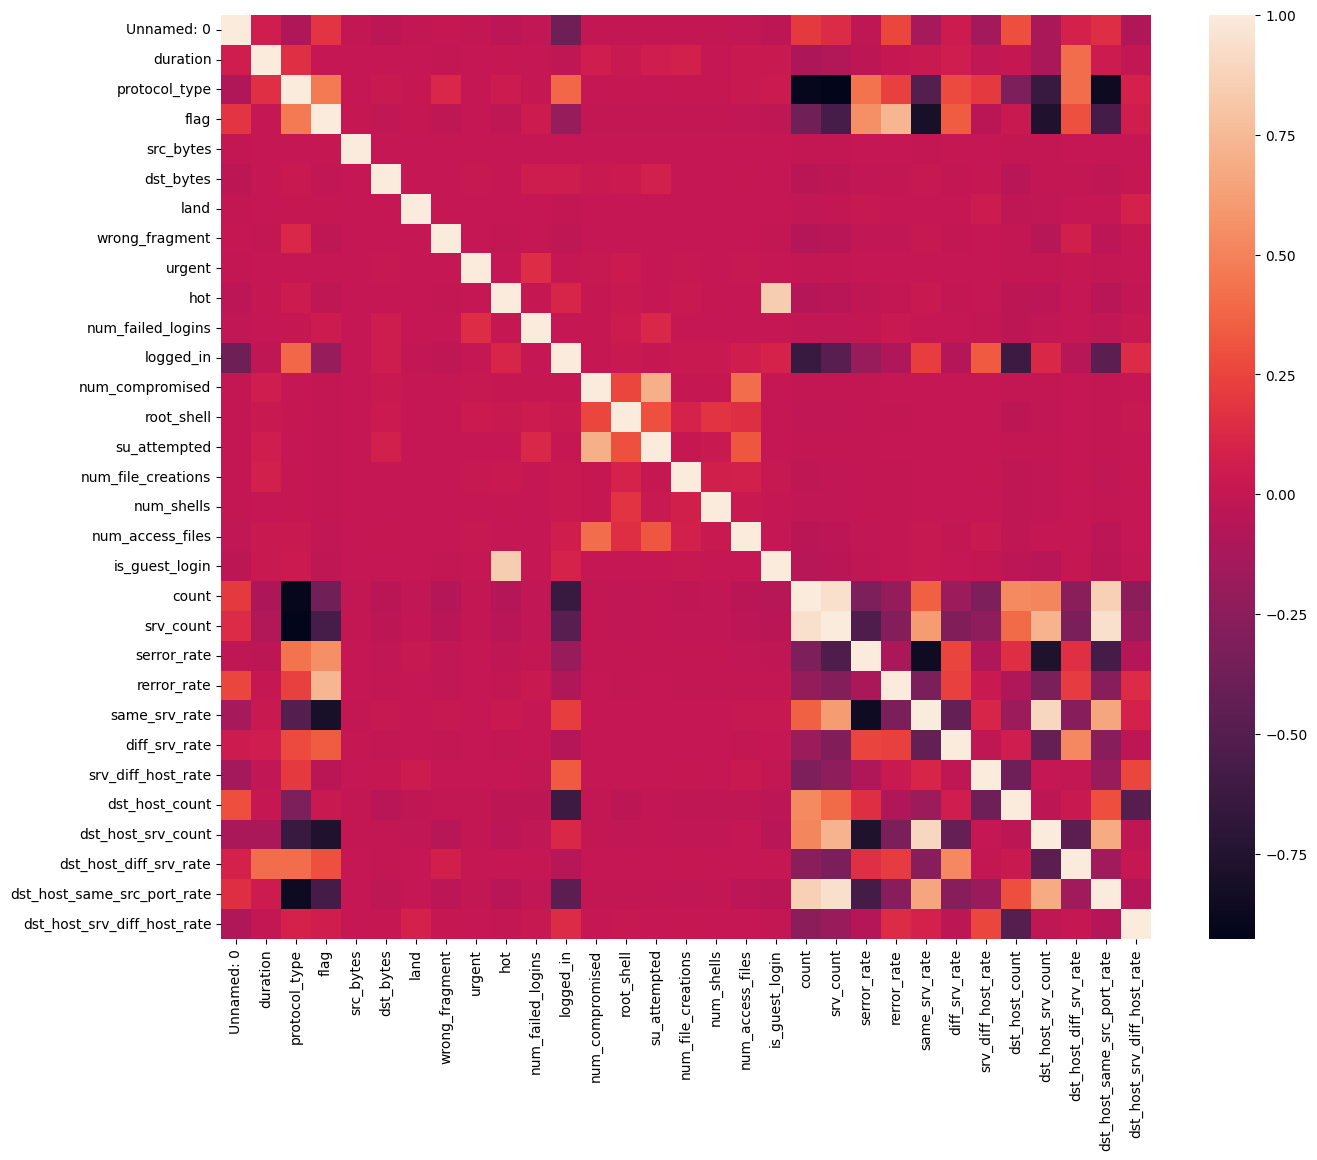

In [19]:
df = df.dropna(axis=1)  # drop columns with NaN

df = df[
    [col for col in df if df[col].nunique() > 1]
]  # keep columns where there are more than 1 unique values

corr = df.corr(numeric_only=True)

plt.figure(figsize=(15, 12))

sns.heatmap(corr)

plt.show()

We can also visualise some statisatics about the dataset

In [20]:
df.describe()

,Unnamed: 0,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
count,494021.000000,494021.000000,494021.000000,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,247010.000000,47.979302,0.467132,0.297730,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,...,0.176687,0.057433,0.791547,0.020982,0.028997,232.470778,188.665670,0.030906,0.601935,0.006684
std,142611.723005,707.746472,0.575606,0.597424,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,...,0.380717,0.231623,0.388189,0.082205,0.142397,64.745380,106.040437,0.109259,0.481309,0.042133
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,123505.000000,0.000000,0.000000,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,46.000000,0.000000,0.000000,0.000000
50%,247010.000000,0.000000,0.000000,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,0.000000,1.000000,0.000000
75%,370515.000000,0.000000,1.000000,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,0.040000,1.000000,0.000000
max,494020.000000,58329.000000,2.000000,10.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000


The modelling compent begins here. Similar to our previous exercise, we needs to split out dataset into train and test set.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# df = df.drop(['target',], axis=1)
# print(df.shape)

# Target variable and train set
Y = df[["Attack Type"]]
X = df.drop(
    [
        "Attack Type",
    ],
    axis=1,
)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42
)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(330994, 31) (163027, 31)
(330994, 1) (163027, 1)


We can then create a loop to train each of our canidate models

In [22]:
from IPython.display import display
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


results = dict(
    name=[],
    train_time=[],
    pred_time=[],
    train_score=[],
    test_score=[],
)


for model_Cls, kwargs in [
    (GaussianNB, {}),
    (DecisionTreeClassifier, dict(criterion="entropy", max_depth=4)),
    (RandomForestClassifier, dict(n_estimators=30)),
    (LogisticRegression, dict(max_iter=12000)),
]:
    model_name = model_Cls.__name__
    print(f"> Training model {model_name}...")
    model = model_Cls(**kwargs)

    tic = time.time()
    model.fit(X_train, Y_train.values.ravel())
    toc = time.time()
    train_time = toc - tic
    print(f"  >> Training took   {train_time:.2f}s...")

    tic = time.time()
    y_pred = model.predict(X_test)
    toc = time.time()
    pred_time = toc - tic
    print(f"  >> Prediction took {pred_time:.2f}s...")

    train_score = model.score(X_train, Y_train)
    print(f"    >>> Evaluation metric on train set: {train_score*100:.2f}%")
    test_score = model.score(X_test, Y_test)
    print(f"    >>> Evaluation metric on test set:  {test_score*100:.2f}%")

    display(model)

    # store results
    results["name"].append(model_name)
    results["train_time"].append(train_time)
    results["pred_time"].append(pred_time)
    results["train_score"].append(train_score)
    results["test_score"].append(test_score)

> Training model GaussianNB...
  >> Training took   0.41s...
  >> Prediction took 0.11s...
    >>> Evaluation metric on train set: 87.98%
    >>> Evaluation metric on test set:  87.94%


GaussianNB()

> Training model DecisionTreeClassifier...
  >> Training took   0.95s...
  >> Prediction took 0.01s...
    >>> Evaluation metric on train set: 99.06%
    >>> Evaluation metric on test set:  99.05%


DecisionTreeClassifier(criterion='entropy', max_depth=4)

> Training model RandomForestClassifier...
  >> Training took   5.48s...
  >> Prediction took 0.23s...
    >>> Evaluation metric on train set: 100.00%
    >>> Evaluation metric on test set:  99.97%


RandomForestClassifier(n_estimators=30)

> Training model LogisticRegression...
  >> Training took   16.03s...
  >> Prediction took 0.01s...
    >>> Evaluation metric on train set: 99.36%
    >>> Evaluation metric on test set:  99.36%


LogisticRegression(max_iter=12000)

With the following results

In [23]:
results_df = pd.DataFrame(results)

results_df

,name,train_time,pred_time,train_score,test_score
0,GaussianNB,0.409727,0.114979,0.879823,0.879431
1,DecisionTreeClassifier,0.949978,0.007906,0.990583,0.990523
2,RandomForestClassifier,5.475606,0.227684,0.999997,0.999724
3,LogisticRegression,16.029800,0.009018,0.993586,0.993608


And We can visualise the Time it took to train our model

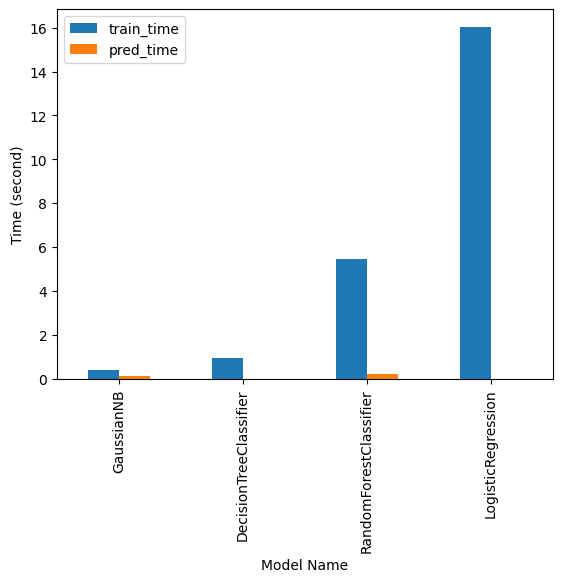

In [24]:
results_df.plot(x="name", y=["train_time", "pred_time"], kind="bar")
plt.gca().set_xlabel("Model Name")
plt.gca().set_ylabel("Time (second)")
plt.show()

And their corresponding prediction score:

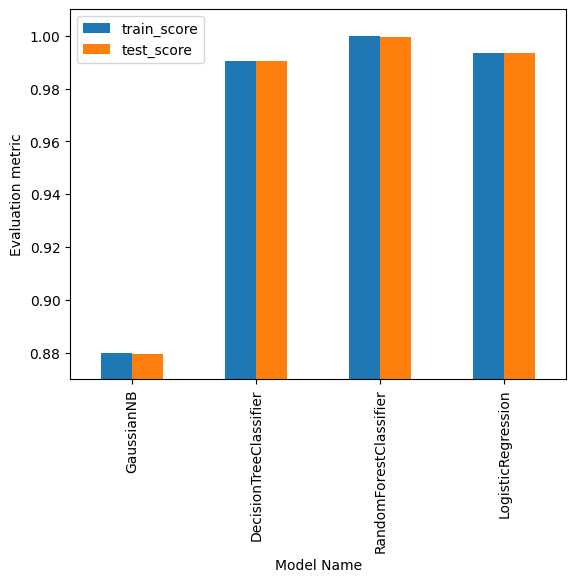

In [25]:
results_df.plot(x="name", y=["train_score", "test_score"], kind="bar")
plt.ylim(0.87, 1.01)
plt.gca().set_xlabel("Model Name")
plt.gca().set_ylabel("Evaluation metric")
plt.show()